- 과거주가의 수익(또는 수익률)분포로 부터 Gaussian kernel density distribution을 구함
- 얻어진 kde에서 resampling 하여 fake data를 만듬
- fake data와 실제 데이터를 기계학습의 Feed로 사용

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import sqlite3 as lite
import tables as tb

In [2]:
db = tb.open_file('data/market.hdf5', mode='r')

In [3]:
df = pd.DataFrame(db.root.URO.Daily.read())

In [4]:
df['date'] = df.date.astype('M8[s]')
df.sort_values('date', inplace=True)
df.set_index(df.date, inplace=True)

In [5]:
df['change'] = df.close.shift(1) - df.close
df.dropna(inplace=True)

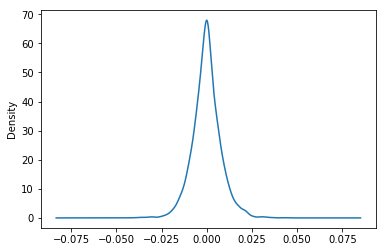

In [6]:
df.change.plot.kde()

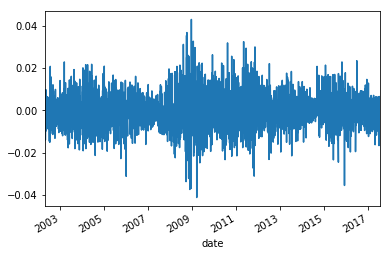

In [37]:
df.change.plot()

In [7]:
kernel = stats.gaussian_kde(df.change)

In [8]:
s=kernel(np.arange(-0.05,0.05,0.0001))

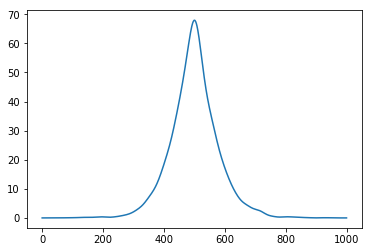

In [9]:
plt.plot(s)

In [10]:
b=kernel.resample(4000)

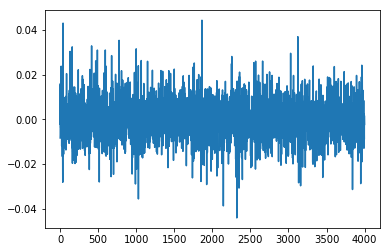

In [11]:
plt.plot(b[0])

### 랜덤샘플의 분산이 시간에 비례하는지 확인

In [30]:
df = pd.DataFrame()
for i in range(1000):
    df[i] = np.cumsum(kernel.resample(1000))

In [35]:
df2 = pd.DataFrame()
df2['mean'] = df.mean(axis=1)
df2['var'] = df.var(axis=1)
df2['std'] = df.std(axis=1)

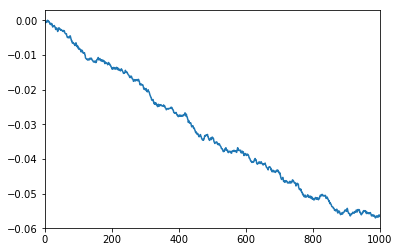

In [32]:
df2['mean'].plot()

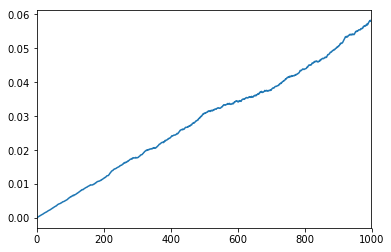

In [37]:
df2['var'].plot()

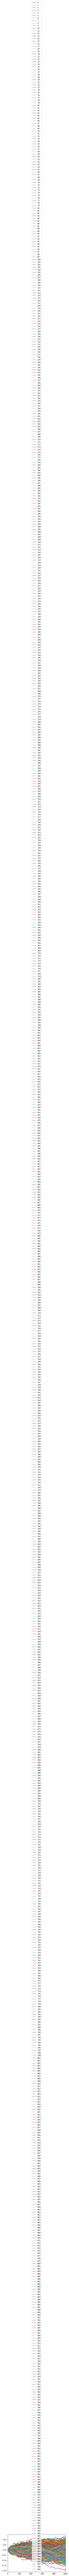

In [42]:
df.plot()